In [1]:
# P341 Nuclear Physics and Instrumentation Lab

# Assignment of Monte-Carlo Methods
# Date of assignment: 17/02/2022
# Date of submission: 14/03/2022

1. Plot values obtained for: N_0 = 100, α = 0.01 s-1, Δt = 1 sec


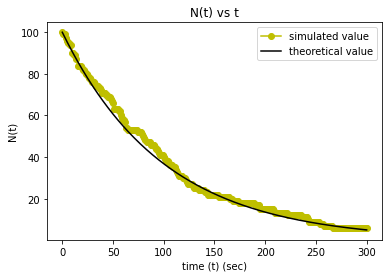

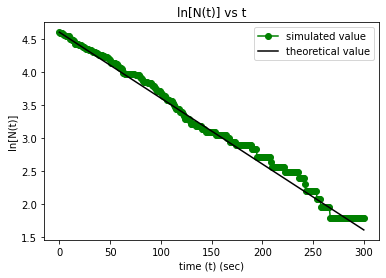

2. Plot values obtained for: N_0 = 5000, α = 0.03 s-1, Δt = 1 sec


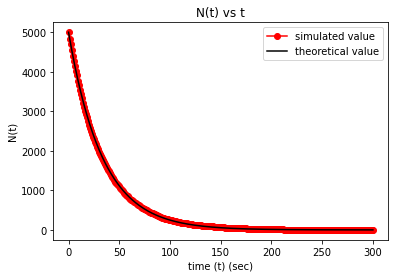

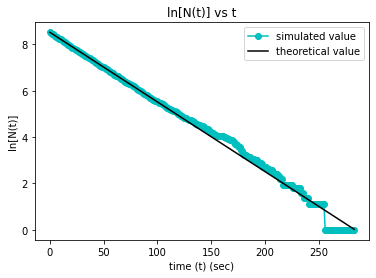

(<matplotlib.legend.Legend at 0x2b2706ef0a0>, None)

In [2]:
# Question 1
# Write a program to simulate radioactive decay, using the information that a nucleus undergoes radioactive decay in time Δt with probability p = αΔt, with αΔt<<1.

# You may want to proceed as follows:
# Consider a system initially having N_0 stable nuclei. How does the number of parent nuclei, N, change in time ?

# Graph the number of remaining nuclei as a function of time for the following cases:
# 1. N_0 = 100, α = 0.01 s-1, Δt = 1 sec
# 2. N_0 = 5000, α = 0.03 s-1, Δt = 1 sec

# Show the results on both linear and logarithmic scales for times between 0 and 300 secs.
# In addition, plot the same graphs (the expected curves) given dN = -αNdt i.e., N(t) = N0 exp(-αt)

# [Solution code]
import random
import math
import matplotlib.pyplot as plt
def decay_simulator(N_0,alpha,T_min=0,T_max=300,dt=1):              # decay simulator function
    T_list = [T_min + x * dt for x in range(int((T_max+dt)/dt))]    # prepares list of time intervals within time T
    N_list = [0 for t in T_list]                                    # Initiates count list
    N_list[0], p = N_0, alpha * dt                                  # places initial count (N_0) and probability (p)
    for i in range(1,len(T_list)):
        N_list[i] = N_list[i-1]                                     # Updates next value for decaying
        for j in range(N_list[i-1]):
            r_val = random.random()                                 # Random value between 0 to 1 is generated
            if r_val < p:
                N_list[i] -= 1                                      # Nucleus decays if random value goes below p
    return N_list, T_list

T, dt = 300, 1

N_0, alpha = 100, 0.01
N_list, T_list = decay_simulator(N_0,alpha,0,T,dt)
Y_list = [N_0*math.exp(-alpha*t) for t in T_list]                   # Original function for comparision was overlayed
print("1. Plot values obtained for: N_0 = 100, α = 0.01 s-1, Δt = 1 sec")
plt.plot(T_list,N_list,'y-o',label='simulated value'), plt.plot(T_list,Y_list,'k-',label='theoretical value')
plt.title('N(t) vs t')
plt.xlabel('time (t) (sec)')
plt.ylabel('N(t)')
plt.legend(), plt.show()
lnN_list, Y_list = [], [math.log(N_0)-(alpha*t) for t in T_list]    # Original function of logarithm of the count values
for n in N_list:
    lnN_list.append(math.log(n))                                    # Logarithm of the count values are computed
plt.plot(T_list,lnN_list,'g-o',label='simulated value'), plt.plot(T_list,Y_list,'k-',label='theoretical value')
plt.title('ln[N(t)] vs t')
plt.xlabel('time (t) (sec)')
plt.ylabel('ln[N(t)]')
plt.legend(), plt.show()

N_0, alpha = 5000, 0.03
N_list, T_list = decay_simulator(N_0,alpha,0,T,dt)
Y_list = [N_0*math.exp(-alpha*t) for t in T_list]

print("2. Plot values obtained for: N_0 = 5000, α = 0.03 s-1, Δt = 1 sec")
plt.plot(T_list,N_list,'r-o',label='simulated value'), plt.plot(T_list,Y_list,'k-',label='theoretical value')
plt.title('N(t) vs t')
plt.xlabel('time (t) (sec)')
plt.ylabel('N(t)')
plt.legend(), plt.show()
lnN_list, Y_list = [], [math.log(N_0)-(alpha*t) for t in T_list]
for n in N_list:
    if n != 0:
        lnN_list.append(math.log(n))
    else:
        T_list.pop(N_list.index(n))
        Y_list.pop(N_list.index(n))
plt.plot(T_list,lnN_list,'c-o',label='simulated value'), plt.plot(T_list,Y_list,'k-',label='theoretical value')
plt.title('ln[N(t)] vs t')
plt.xlabel('time (t) (sec)')
plt.ylabel('ln[N(t)]')
plt.legend(), plt.show()

1. Plot values obtained for: N_0 = 500, a = 4x10^(-5) s-1, Δt = 10 sec, T=100 sec
Frequency distribution plot (bar graph) with totalized Poisson distribution


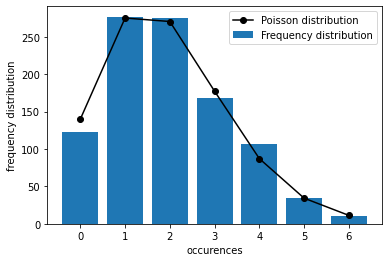

Frequency density distribution plot (histogram) with normalized poisson distribution


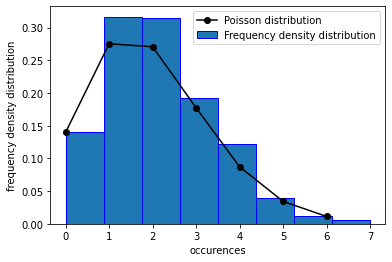

2. Plot values obtained for: N_0 = 500, a = 2x10^(-5) s-1, Δt = 10 sec, T=100 sec
Frequency distribution plot (bar graph) with totalized Poisson distribution


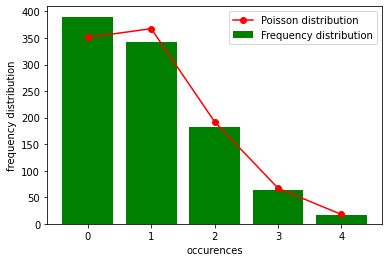

Frequency density distribution plot (histogram) with normalized poisson distribution


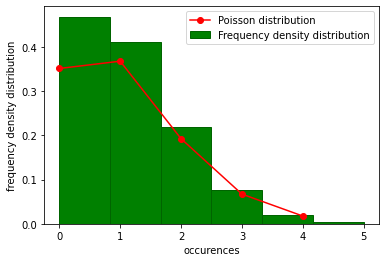

In [10]:
# Question 2
# Modify the above program to simulate an experiment that counts the number of decays observed in a time interval T.

# Allow the experiment to be repeated and the histogram the distribution of number of decays for the following two cases:
# a) N_0 = 500, a = 4x10^(-5) s-1, Δt = 10 sec, T=100 sec
# b) N_0 = 500, a = 2x10^(-5) s-1, Δt = 10 sec, T=100 sec

# In each case, show the distribution using 1000 experiments and overlay the expected Poisson distribution.

#[Solution code]
import random
import math
import matplotlib.pyplot as plt
import statistics as stat
def decay_simulator_detector(N_0,alpha,T_min,T_max,dt):             # decay simulator and detector function
    T_list = [T_min + x * dt for x in range(int((T_max+dt)/dt))]
    N_list = [0 for t in T_list]
    N_list[0], p, decay_val = N_0, alpha * dt, 0                    # decay_val is initiated to keep count of decayed nuclei
    for i in range(1,len(T_list)):
        N_list[i] = N_list[i-1]
        for j in range(N_list[i-1]):
            r_val = random.random()
            #print(p, r_val, r_val < p)
            if r_val < p:
                N_list[i] -= 1
                decay_val += 1                                      # Decayed nuclei gets detected and counted by decay_val
    return N_list, T_list, decay_val

T, dt = 100, 10
N_0, alpha = 500, (4*(10**(-5)))
D_list = [0 for i in range(1000)]
for i in range(len(D_list)):
    N_list, T_list, D_list[i] = decay_simulator_detector(N_0,alpha,0,T,dt)

var, freq_list = stat.variance(D_list), []
for i in range(max(D_list)):
    freq_list.append(D_list.count(i))

def plotmaker(var,freq_list,D_list):                                # Plot for frequency distribution with Poisson distribution overlay
    k_list = [i for i in range(max(D_list))]
    f_k_list = [(1000)*(var**k)*(math.exp(-var))*(1/math.factorial(k)) for k in k_list]
    plt.bar(k_list,freq_list,label='Frequency distribution')
    plt.plot(k_list,f_k_list,'k-o',label='Poisson distribution')
    plt.xlabel('occurences')
    plt.ylabel('frequency distribution')
    plt.legend(),plt.show()

def plotmaker1(var,D_list):                                         # Plot for frequency density distribution with Poisson distribution overlay
    k_list = [i for i in range(max(D_list))]
    f_k_list = [(var**k)*(math.exp(-var))*(1/math.factorial(k)) for k in k_list]
    plt.hist(D_list,bins=8,density='true',ec='blue',label='Frequency density distribution')
    plt.plot(k_list,f_k_list,'k-o',label='Poisson distribution')
    plt.xlabel('occurences')
    plt.ylabel('frequency density distribution')
    plt.legend(),plt.show()

print('1. Plot values obtained for: N_0 = 500, a = 4x10^(-5) s-1, Δt = 10 sec, T=100 sec')
print('Frequency distribution plot (bar graph) with totalized Poisson distribution')
plotmaker(var,freq_list,D_list)
print('Frequency density distribution plot (histogram) with normalized poisson distribution')
plotmaker1(var,D_list)

N_0, alpha = 500, (2*(10**(-5)))
D_list = [0 for i in range(1000)]
for i in range(len(D_list)):
    N_list, T_list, D_list[i] = decay_simulator_detector(N_0,alpha,0,T,dt)

var, freq_list = stat.variance(D_list), []
for i in range(max(D_list)):
    freq_list.append(D_list.count(i))

def plotmaker(var,freq_list,D_list):
    k_list = [i for i in range(max(D_list))]
    f_k_list = [(1000)*(var**k)*(math.exp(-var))*(1/math.factorial(k)) for k in k_list]
    plt.bar(k_list,freq_list,color='green',label='Frequency distribution')
    plt.plot(k_list,f_k_list,'r-o',label='Poisson distribution')
    plt.xlabel('occurences')
    plt.ylabel('frequency distribution')
    plt.legend(),plt.show()

def plotmaker1(var,D_list):
    k_list = [i for i in range(max(D_list))]
    f_k_list = [(var**k)*(math.exp(-var))*(1/math.factorial(k)) for k in k_list]
    plt.hist(D_list,bins=6,density='true',color='green',ec='darkgreen',label='Frequency density distribution')
    plt.plot(k_list,f_k_list,'r-o',label='Poisson distribution')
    plt.xlabel('occurences')
    plt.ylabel('frequency density distribution')
    plt.legend(),plt.show()
print('2. Plot values obtained for: N_0 = 500, a = 2x10^(-5) s-1, Δt = 10 sec, T=100 sec')
print('Frequency distribution plot (bar graph) with totalized Poisson distribution')
plotmaker(var,freq_list,D_list)
print('Frequency density distribution plot (histogram) with normalized poisson distribution')
plotmaker1(var,D_list)

In [4]:
# Question 3
# Write a program to generate the distribution f(θ)=1./(sin²θ+ acos²θ), where 0<θ<π.
# Compare your results using the inversion technique and the acceptance-rejection technique: 10000 trials each for values of a=0.5 and 0.001.
# You should overlay the plots for four different f(θ) distributions, properly normalized.

The given function is $$f(\theta)=\frac{1}{\sin^2\theta+a\cos^2 \theta}$$

The function is not normalised and the normalisation constant is $\frac{\sqrt{a}}{\pi}$.

Now the normalised function is $$\mathscr{F(\theta)=\frac{\sqrt{a}}{\pi}\bigg(\frac{1}{\sin^2\theta+a\cos^2 \theta}}\bigg)~~~~~\{0\leq\theta\leq\pi\}$$
and also $$\int_{0}^{\pi}\mathscr{F(\theta)} d\theta = 1 $$

For $u=\text{random number between 0 to 1}$ the application of inversion will give:
$$\theta = \tan^{-1}({\sqrt{a}}\tan (\pi u))~~~~~~~~\{0<u<0.5\}$$
$$\theta =\pi+ \tan^{-1}({\sqrt{a}}\tan (\pi u))~~~~~~~~\{0.5<u<1\}$$

1. Plot values obtained for: a=0.5
Distribution obtained using inversion technique


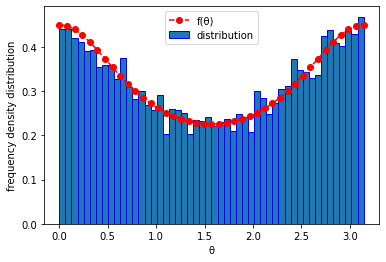

Distribution obtained using acceptance-rejection technique


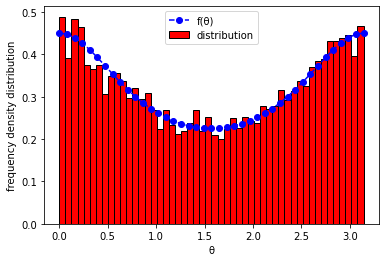

2. Plot values obtained for: a=0.001
Distribution obtained using inversion technique


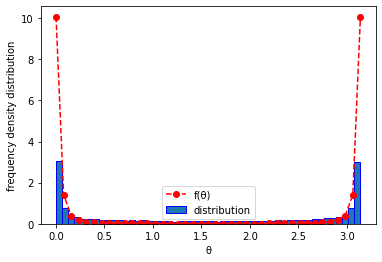

Distribution obtained using acceptance-rejection technique


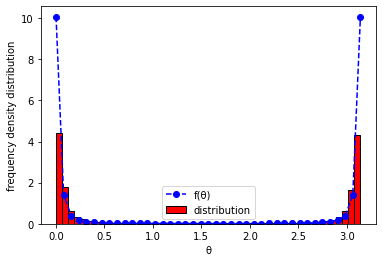

(<matplotlib.legend.Legend at 0x2b270cfeb20>, None)

In [8]:

#[Solution code]
import random
import math
import matplotlib.pyplot as plt
import statistics as stat

def theta(u,a):                                                             # θ value as a function of random number obtained
    return math.atan(((a)**0.5)*(math.tan(math.pi*(u))))

def p(x,a):
  return 1/((math.sin(x))**2 + a*(math.cos(x)**2))

def acceptance_rejection(N,fbig,zmin,zmax):                                 # Acceptance-rejection function
    n_accept, x_list = 0, []                                                # accepting value initiated
    while n_accept < N:
        t, u = (zmax-zmin)*random.random() + zmin, random.random()
        if u < p(t,a)/ fbig:                                                # when the generated random value is less than function/max function value
            n_accept += 1
            x_list.append(t)                                                # accepted value is appended
    return x_list


iterations, theta_list, a = 10000, [], 0.5
for t in range(iterations):
    u = random.random()
    if u < 0.5:
        theta_list.append(theta(u,a))
    else:
        theta_list.append(theta(u,a) + math.pi)

x_list = [0.025*i*math.pi for i in range(41)]
p_list = [p(x,a)*((a)**(0.5)/math.pi) for x in x_list]
print('1. Plot values obtained for: a=0.5')
print("Distribution obtained using inversion technique")
plt.plot(x_list,p_list,'r--o',label='f(θ)')
plt.hist(theta_list, bins=50,ec='blue', density='true',label='distribution')
plt.xlabel('θ')
plt.ylabel('frequency density distribution')
plt.legend(),plt.show()

theta_list = acceptance_rejection(iterations,2,0,math.pi)
print("Distribution obtained using acceptance-rejection technique")
plt.plot(x_list,p_list,'b--o',label='f(θ)')
plt.hist(theta_list, bins=50,color='red',ec='black', density='true',label='distribution')
plt.xlabel('θ')
plt.ylabel('frequency density distribution')
plt.legend(),plt.show()

a = 0.001
for t in range(iterations):
    u = random.random()
    if u < 0.5:
        theta_list.append(theta(u,a))
    else:
        theta_list.append(theta(u,a) + math.pi)

p_list = [p(x,a)*((a)**(0.5)/math.pi) for x in x_list]
print('2. Plot values obtained for: a=0.001')
print("Distribution obtained using inversion technique")
plt.plot(x_list,p_list,'r--o',label='f(θ)')
plt.hist(theta_list, bins=50,ec='blue', density='true',label='distribution')
plt.xlabel('θ')
plt.ylabel('frequency density distribution')
plt.legend(),plt.show()

theta_list = acceptance_rejection(iterations,300,0,math.pi)
print("Distribution obtained using acceptance-rejection technique")
plt.plot(x_list,p_list,'b--o',label='f(θ)')
plt.hist(theta_list, bins=50,color='red',ec='black', density='true',label='distribution')
plt.xlabel('θ')
plt.ylabel('frequency density distribution')
#plt.ylim(0,4)
plt.legend(),plt.show()


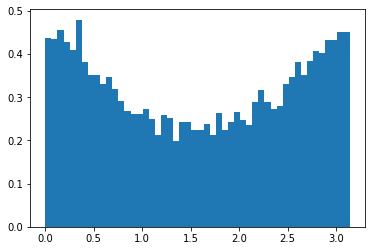

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
import math


def p(x):
  return 1/((math.sin(x))**2 + 0.5*(math.cos(x)**2))
   




def accept_reject(N,fbig,zmin,zmax,p):
    n_accept, x_list = 0, []
    while n_accept < N:
        t, u = (zmax-zmin)*random.random() + zmin, random.random()
        if u < p(t)/ fbig:
            n_accept += 1
            x_list.append(t)
    return x_list


x = accept_reject(10000,3,0,3.14,p)
bins, edges, patches = plt.hist(x, bins=50, density='true')

Text(0.5, 1.0, 'Overlaying the original Function over a distribution')

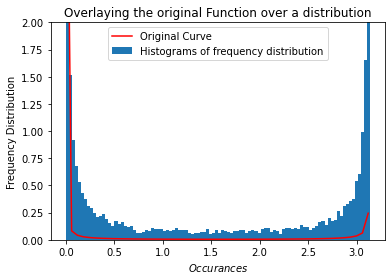

In [7]:
def p(x):
  return 1/(math.sin(x)*2 + 0.001*math.cos(x)*2)

def accept_reject(N):
    zmin = 0
    zmax = 3.14
    fbig = 100

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (zmax-zmin)*np.random.rand() + zmin
        y = np.random.rand()
        if y < p(t)/ fbig:
            n_accept += 1
            x_list.append(t)
    return x_list


n = accept_reject(10000)
bins, edges, patches = plt.hist(n, bins=100,density='True',label="Histograms of frequency distribution") 
m = np.arange(0,math.pi,0.06) 
x_list_plot=[p(x)*math.sqrt(0.001)/math.pi for x in m]
plt.plot(m,x_list_plot,'-r',label="Original Curve")
plt.legend()
plt.xlabel("$Occurances$")
plt.ylabel("Frequency Distribution")
plt.ylim(0,2)
plt.title("Overlaying the original Function over a distribution")